In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create list of cities

## Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

## Create a list for holding the cities.
cities = []

## Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    ## If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
## Print the city count to confirm sufficient count.
#len(cities)

598

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4aaf526f731ea82acff5774904596bb5


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        #print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marystown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | constitucion
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | sao borja
Processing Record 9 of Set 1 | kangaatsiaq
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | banjar
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | jacareacanga
Processing Record 16 of Set 1 | tondano
Processing Record 17 of Set 1 | muros
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | gunjur
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | sehithwa
Proc

Processing Record 34 of Set 4 | kumi
Processing Record 35 of Set 4 | boguchany
Processing Record 36 of Set 4 | vysokogornyy
Processing Record 37 of Set 4 | ustikolina
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | mehamn
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | rongcheng
Processing Record 42 of Set 4 | peniche
Processing Record 43 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 4 | sokolo
Processing Record 45 of Set 4 | tambura
Processing Record 46 of Set 4 | kayerkan
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | boueni
Processing Record 50 of Set 4 | evensk
Processing Record 1 of Set 5 | sioux lookout
Processing Record 2 of Set 5 | fairbanks
Processing Record 3 of Set 5 | safakulevo
Processing Record 4 of Set 5 | urengoy
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | ushibuka
Processin

Processing Record 20 of Set 8 | bathsheba
Processing Record 21 of Set 8 | bani walid
Processing Record 22 of Set 8 | dawlatabad
Processing Record 23 of Set 8 | san patricio
Processing Record 24 of Set 8 | omachi
Processing Record 25 of Set 8 | nuuk
Processing Record 26 of Set 8 | casper
Processing Record 27 of Set 8 | baymak
Processing Record 28 of Set 8 | tecoanapa
Processing Record 29 of Set 8 | cherskiy
Processing Record 30 of Set 8 | bassano
Processing Record 31 of Set 8 | mechetinskaya
Processing Record 32 of Set 8 | cam ranh
Processing Record 33 of Set 8 | siocon
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | tuy hoa
Processing Record 36 of Set 8 | nanhai
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | erenhot
Processing Record 39 of Set 8 | hirara
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 42 of Set 8 | puro
Processing Record 43 of Set 8 | tu

Processing Record 12 of Set 12 | batagay-alyta
Processing Record 13 of Set 12 | tahe
Processing Record 14 of Set 12 | porto velho
Processing Record 15 of Set 12 | adrar
Processing Record 16 of Set 12 | birnin kebbi
Processing Record 17 of Set 12 | teahupoo
Processing Record 18 of Set 12 | saint-pierre
Processing Record 19 of Set 12 | khasan
Processing Record 20 of Set 12 | snasa
Processing Record 21 of Set 12 | lahad datu
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | sao filipe
Processing Record 24 of Set 12 | kozelsk
Processing Record 25 of Set 12 | kirando
Processing Record 26 of Set 12 | inuvik
Processing Record 27 of Set 12 | yegros
Processing Record 28 of Set 12 | martapura
Processing Record 29 of Set 12 | lithakia
Processing Record 30 of Set 12 | chapais
Processing Record 31 of Set 12 | iisalmi
Processing Record 32 of Set 12 | karabulak
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | bhadrachalam
Processing Record 35 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marystown,CA,2020-08-17 23:27:41,47.17,-55.15,64.00,100,100,7.11
1,Mataura,NZ,2020-08-17 23:27:41,-46.19,168.86,35.01,97,95,4.00
2,Tiksi,RU,2020-08-17 23:27:41,71.69,128.87,45.50,95,100,2.06
3,Barrow,US,2020-08-17 23:27:42,71.29,-156.79,50.00,76,1,19.46
4,Longyearbyen,SJ,2020-08-17 23:27:42,78.22,15.64,44.60,81,75,8.05
5,Constitucion,CL,2020-08-17 23:23:20,-35.33,-72.42,48.96,80,6,11.59
6,Kapaa,US,2020-08-17 23:27:42,22.08,-159.32,86.00,62,20,14.99
7,Sao Borja,BR,2020-08-17 23:24:41,-28.66,-56.00,54.10,73,0,8.05
8,Kangaatsiaq,GL,2020-08-17 23:27:43,68.31,-53.46,47.77,68,61,1.92
9,Avarua,CK,2020-08-17 23:23:20,-21.21,-159.78,73.40,64,24,13.87


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/17/20'

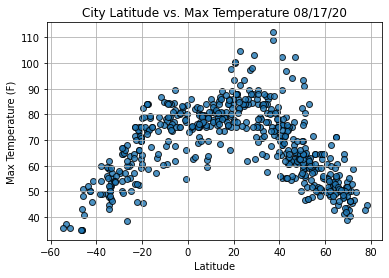

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

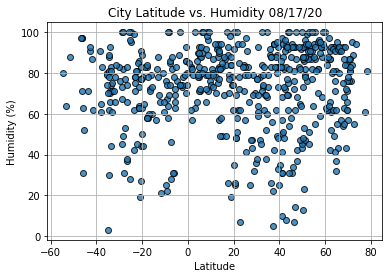

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

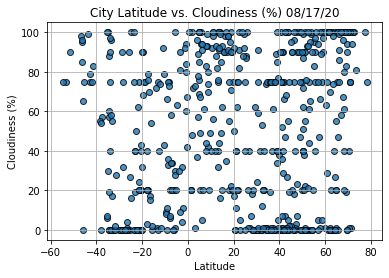

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

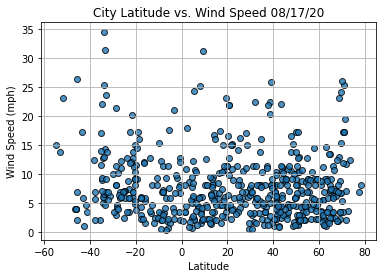

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

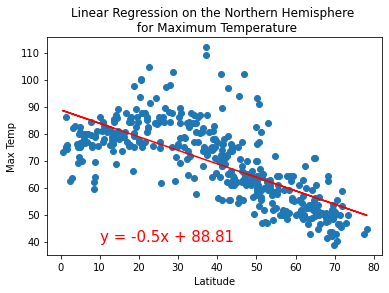

In [31]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,40))

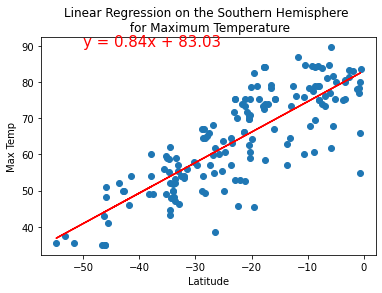

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))

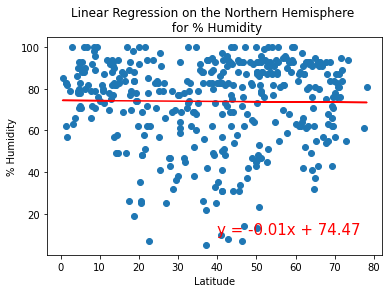

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

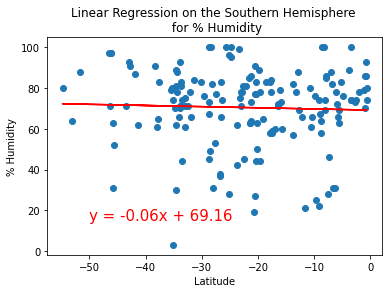

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

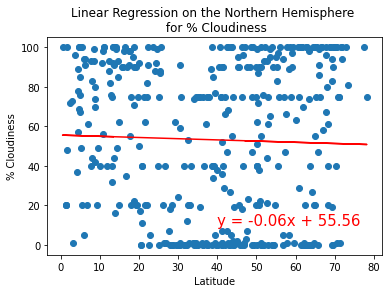

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(40,10))

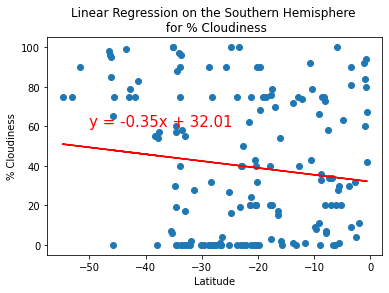

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))

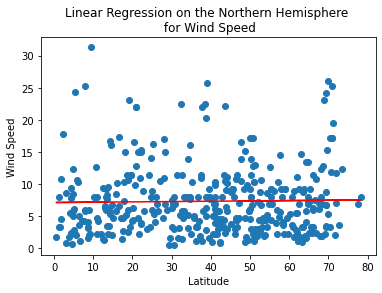

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,35))

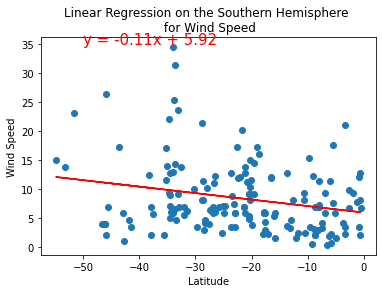

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,35))

In [1]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Marystown,CA,2020-08-17 23:27:41,47.17,-55.15,64.00,100,100,7.11
1,1,Mataura,NZ,2020-08-17 23:27:41,-46.19,168.86,35.01,97,95,4.00
2,2,Tiksi,RU,2020-08-17 23:27:41,71.69,128.87,45.50,95,100,2.06
3,3,Barrow,US,2020-08-17 23:27:42,71.29,-156.79,50.00,76,1,19.46
4,4,Longyearbyen,SJ,2020-08-17 23:27:42,78.22,15.64,44.60,81,75,8.05


In [3]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [9]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [10]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [12]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,6,Kapaa,US,2020-08-17 23:27:42,22.08,-159.32,86.00,62,20,14.99
10,10,Banjar,ID,2020-08-17 23:27:43,-8.19,114.97,78.80,100,75,6.93
14,14,Jacareacanga,BR,2020-08-17 23:27:44,-6.22,-57.75,84.58,31,0,1.95
15,15,Tondano,ID,2020-08-17 23:27:44,1.30,124.91,75.20,83,20,3.36
17,17,Hithadhoo,MV,2020-08-17 23:27:45,-0.60,73.08,83.50,74,42,6.67
20,20,Gunjur,GM,2020-08-17 23:27:45,13.20,-16.73,80.60,88,40,8.05
23,23,Saint-Gabriel,CA,2020-08-17 23:27:46,46.30,-73.38,77.00,7,18,3.00
25,25,Georgetown,MY,2020-08-17 23:27:46,5.41,100.34,77.00,88,20,2.24
26,26,Vaini,TO,2020-08-17 23:27:47,-21.20,-175.20,75.20,73,75,12.75
35,35,Palasa,IN,2020-08-17 23:27:49,18.77,84.42,79.21,84,100,5.99


In [13]:
preferred_cities_df.count()

City_ID       202
City          202
Country       202
Date          202
Lat           202
Lng           202
Max Temp      202
Humidity      202
Cloudiness    202
Wind Speed    202
dtype: int64

In [14]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
6,Kapaa,US,86.00,22.08,-159.32,
10,Banjar,ID,78.80,-8.19,114.97,
14,Jacareacanga,BR,84.58,-6.22,-57.75,
15,Tondano,ID,75.20,1.30,124.91,
17,Hithadhoo,MV,83.50,-0.60,73.08,
20,Gunjur,GM,80.60,13.20,-16.73,
23,Saint-Gabriel,CA,77.00,46.30,-73.38,
25,Georgetown,MY,77.00,5.41,100.34,
26,Vaini,TO,75.20,-21.20,-175.20,
35,Palasa,IN,79.21,18.77,84.42,


In [17]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}

# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

len(hotels["results"])

20

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]

In [19]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [22]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [23]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))